In [18]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

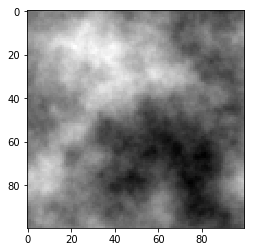

In [19]:
DATADIR = "C:/Users/C1764397/Workshop/PhD/Data/fBmFields/2DUnexponentiated/100px/Training/features"

for img in os.listdir(DATADIR):
    img_array = np.loadtxt(os.path.join(DATADIR,img))
    plt.imshow(img_array, cmap = 'gray')
    plt.show()
    break

In [20]:
print(img_array)

[[ 115.  116.  121. ...,   84.   90.  103.]
 [ 116.  116.  116. ...,   87.   89.  112.]
 [ 116.  117.  118. ...,   90.  100.  113.]
 ..., 
 [ 113.  112.  121. ...,   87.   95.  107.]
 [ 113.  113.  123. ...,   81.   88.   98.]
 [ 113.  118.  126. ...,   77.   90.  102.]]


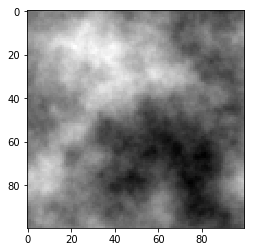

In [21]:
IMG_SIZE = 100

new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [22]:
labels = np.loadtxt("C:/Users/C1764397/Workshop/PhD/Data/fBmFields/2DUnexponentiated/100px/Training/labels/labels.txt")
print(labels)

[ 0.80056205  0.35942806  0.3723635  ...,  0.3217232   0.26028545
  0.95959567]


In [23]:
training_data = []

def create_training_data():
    c=0
    for img in tqdm(os.listdir(DATADIR)):
        try:
            img_array = np.loadtxt(os.path.join(DATADIR,img))
            new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
            training_data.append([new_array,labels[c]])
            c+=1
        except Exception as e:
            pass

create_training_data()
print(len(training_data))

100%|████████████████████████████████████████████████████████████████████████████| 20000/20000 [12:11<00:00, 27.33it/s]


20000


In [24]:
import random

random.shuffle(training_data)

In [25]:
for sample in training_data[:10]:
    print(sample[1])

0.0446936740427
0.944827267592
0.115470002716
0.047185917811
0.439264541328
0.663066447576
0.628508349072
0.640376300079
0.269243402013
0.805851122283


In [27]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)
    
print(X[0])    
print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

[[  78.  102.  115. ...,   92.   64.   55.]
 [ 129.  139.  144. ...,   62.   73.   95.]
 [ 132.  170.  160. ...,   80.   95.  106.]
 ..., 
 [ 135.  136.   92. ...,  131.  128.  120.]
 [ 137.  125.   85. ...,  107.   81.  101.]
 [  86.   73.   74. ...,   73.   46.   82.]]
[[[[  78.]
   [ 102.]
   [ 115.]
   ..., 
   [  92.]
   [  64.]
   [  55.]]

  [[ 129.]
   [ 139.]
   [ 144.]
   ..., 
   [  62.]
   [  73.]
   [  95.]]

  [[ 132.]
   [ 170.]
   [ 160.]
   ..., 
   [  80.]
   [  95.]
   [ 106.]]

  ..., 
  [[ 135.]
   [ 136.]
   [  92.]
   ..., 
   [ 131.]
   [ 128.]
   [ 120.]]

  [[ 137.]
   [ 125.]
   [  85.]
   ..., 
   [ 107.]
   [  81.]
   [ 101.]]

  [[  86.]
   [  73.]
   [  74.]
   ..., 
   [  73.]
   [  46.]
   [  82.]]]]


In [28]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()